<a href="https://colab.research.google.com/github/Anshu-382/Turtle_Trading/blob/main/Assignemnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

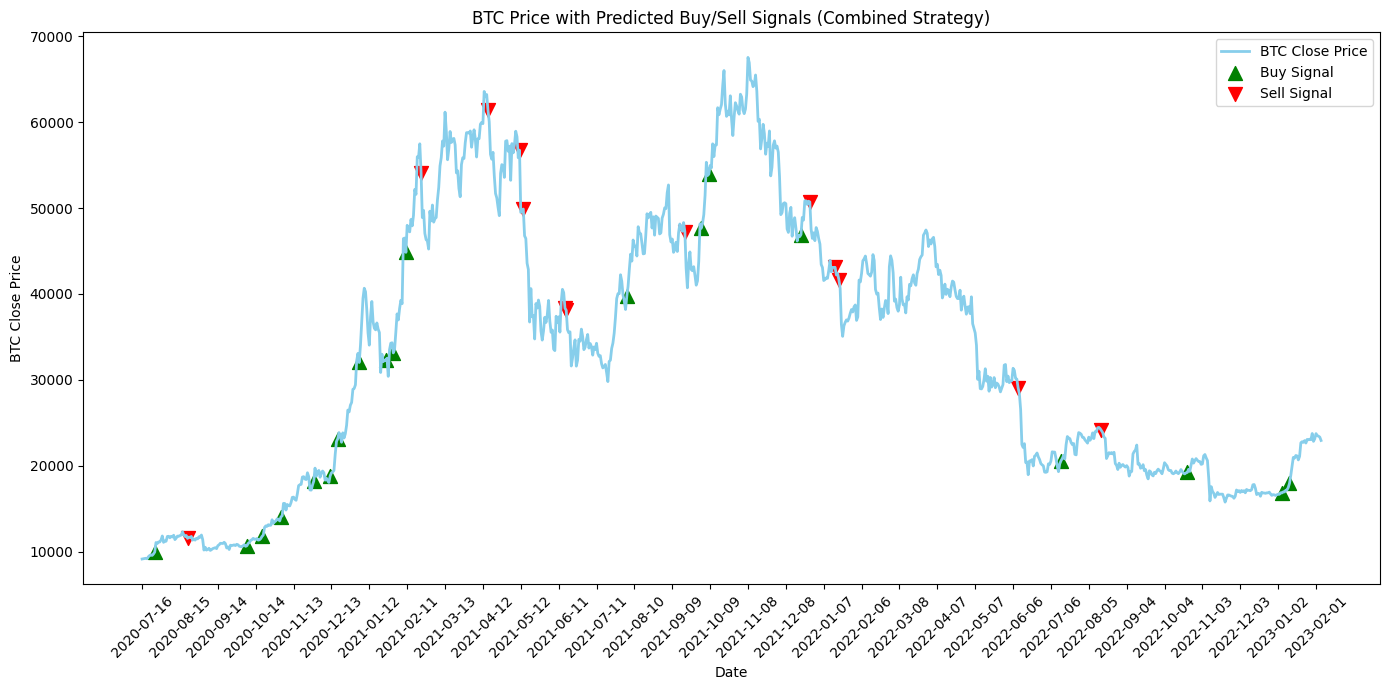

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data.csv')
df = pd.DataFrame(data)

df['datetime'] = pd.to_datetime(df['datetime'])

# Calculating the 5-day average price
df['5_day_avg'] = df['close'].rolling(window=5).mean()

# Creating the diversification model
from sklearn.ensemble import RandomForestClassifier
features = ['close', 'volume', 'RSI', '9_ema', '21_ema', '50_ema', '200_ema', 'Fear_and_Greed_Index']
X = df[features]
y = df['signal'].map({'buy': 0, 'sell': 1, 'none': 2})
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Combining the strategies
df['signal_combined'] = df.apply(lambda row: 'buy' if row['5_day_avg'] < row['close'] and model.predict([[row['close'], row['volume'], row['RSI'], row['9_ema'], row['21_ema'], row['50_ema'], row['200_ema'], row['Fear_and_Greed_Index']]])[0] == 0 else 'sell' if row['5_day_avg'] > row['close'] and model.predict([[row['close'], row['volume'], row['RSI'], row['9_ema'], row['21_ema'], row['50_ema'], row['200_ema'], row['Fear_and_Greed_Index']]])[0] == 1 else 'none', axis=1)

# Visualizing the results
plt.figure(figsize=(14, 7))
plt.plot(df['datetime'], df['close'], label='BTC Close Price', color='skyblue', linewidth=2)

# Ploting buy signals
buy_signals = df[df['signal_combined'] == 'buy']
plt.scatter(buy_signals['datetime'], buy_signals['close'], label='Buy Signal', marker='^', color='green', alpha=1, s=100)

# Ploting sell signals
sell_signals = df[df['signal_combined'] == 'sell']
plt.scatter(sell_signals['datetime'], sell_signals['close'], label='Sell Signal', marker='v', color='red', alpha=1, s=100)

plt.xticks(df['datetime'][::30], df['datetime'].dt.strftime('%Y-%m-%d')[::30], rotation=45)

plt.title('BTC Price with Predicted Buy/Sell Signals (Combined Strategy)')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()
plt.tight_layout()
plt.show()